In [20]:
import numpy as np
import scipy as sc
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model, metrics


In [2]:
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data 


In [4]:
diabetes.keys()

['data', 'DESCR', 'feature_names', 'target']

In [8]:
print diabetes.data.shape
print diabetes.feature_names
print diabetes.DESCR

(442L, 10L)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more informa

In [17]:
data = pd.DataFrame(diabetes.data)
data.columns = diabetes.feature_names
print data.head()
print data.shape

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  
(442, 10)


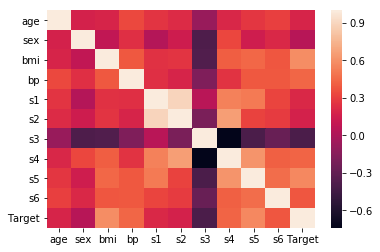

In [28]:
import seaborn as sns
corr = data.corr()

# print(corr)

sns.heatmap(corr, 

        xticklabels=corr.columns,

        yticklabels=corr.columns)

In [18]:
data['Target'] = diabetes.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [33]:
from sklearn.model_selection import *
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [34]:
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test= diabetes.target[-20:]

In [35]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients

print('Coefficients: \n', regr.coef_)

# The mean squared error

mean_squared_error = metrics.mean_squared_error(diabetes_y_test, diabetes_y_pred)

print("Mean squared error: %.2f" % mean_squared_error)

print("="*120)

('Coefficients: \n', array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01]))
Mean squared error: 2004.57


In [38]:
# train

X = diabetes_X_train

y = diabetes_y_train
W = np.random.uniform(low=-0.1, high=0.1, size=diabetes_X.shape[1])
b = 0.0
 
learning_rate = 0.1
epochs = 10000

In [39]:
for i in range(epochs):
    # calculate predictions
    y_predict = X.dot(W) + b
 
    # calculate error and cost (mean squared error)
    error = y - y_predict
    mean_squared_error = np.mean(np.power(error, 2))
 
    # calculate gradients
    W_gradient = -(1.0/len(X)) * error.dot(X)
    b_gradient = -(1.0/len(X)) * np.sum(error)
 
    # update W and b in the opposite direction to the gradient
    W = W - (learning_rate * W_gradient)
    b = b - (learning_rate * b_gradient)
 
    # diagnostic output
    if i % 5000 == 0: print("Epoch %d: %f" % (i, mean_squared_error))
 
# test
X = diabetes_X_test
y = diabetes_y_test
 
y_predict = X.dot(W) + b
error = y - y_predict
mean_squared_error = np.mean(np.power(error, 2))
print("Mean squared error: %.2f" % mean_squared_error)


Epoch 0: 29467.696718
Epoch 5000: 3048.159963
Mean squared error: 2125.10


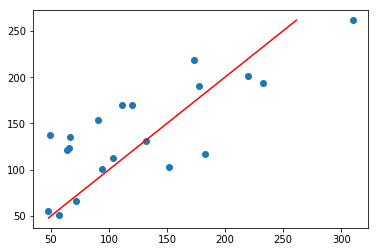

In [41]:
# Y_pred = m*X + c

plt.scatter(y, y_predict) 
plt.plot([min(y), max(y_predict)], [min(y), max(y_predict)], color='red')  # regression line
plt.show()

In [42]:
y_predict

array([193.95036093, 153.28093011, 170.42245356, 103.0284296 ,
       169.65801995, 135.34327141, 261.46311094, 101.32821103,
       117.35975495, 123.96365996, 218.31808446,  66.3915294 ,
       137.87684601, 121.38456852,  55.9625079 , 190.72295186,
       112.89291947, 131.39416491, 201.62578049,  51.11480638])